# Implementation

Training Accuracy: 0.7
Test Accuracy: 0.8


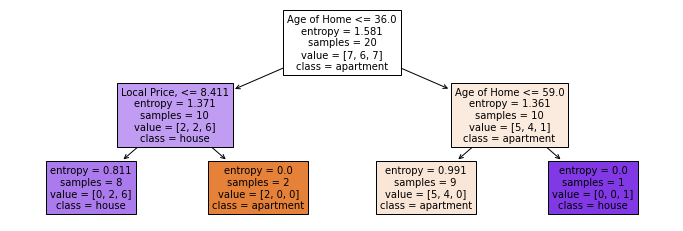

In [4]:
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

# Importing the data
data= pd.read_csv('train.csv')  
x_train = data.iloc[:, 1:9].values  
y_train = data.iloc[:, 9].values  

data1= pd.read_csv('test.csv')  
x_test = data1.iloc[:, 1:9].values  
y_test = data1.iloc[:, 9].values  

# create and train model
clf = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')  # set hyperparameter
clf.fit(x_train, y_train)

# plot tree
plt.figure(figsize=(12,4))
tree.plot_tree(clf, fontsize=10, 
               feature_names=['Local Price,', 'Bathrooms', 'Land Area,', 'Living Area', 'Num Garages,', 'Num Rooms', 'Num Bedrooms,', 'Age of Home'],
               class_names=['apartment', 'condo', 'house'],
               filled='true')

y_pred_training = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

print(f'Training Accuracy: {accuracy_score(y_train, y_pred_training)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test)}')

<br><br>
# Report
### Part 1 (a & b)
    y_pred_training = clf.predict(x_train)
    print(f'Training Accuracy: {accuracy_score(y_train, y_pred_training)}')

output: Training Accuracy: 1.0
<br>

    y_pred_test = clf.predict(x_test)
    print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test)}')
output: Test Accuracy: 0.4

I trained the model and then validated the accuracy on the training and test set. As you can see, using the default parameters, the model trained to 100% accuracy for the training data. The test data, however, didn't do as good. The test data had an accuracy of 40% which is not too much better than a random guess. I believe we can improve this model by limiting the depth of the tree.
<br>
<br>

### Part 2

#### Depths and their Respective Accuracies


- Depth: 1
  - Training Accuracy: 0.55
  - Test Accuracy: 0.4

- Depth: 2
  - Training Accuracy: 0.7
  - Test Accuracy: 0.8

- Depth: 3
  - Training Accuracy: .8
  - Test Accuracy: 0.6

- Depth: 4
  - Training Accuracy: 0.95
  - Test Accuracy: 0.4

- Depth: 5
  - Training Accuracy: 1.0
  - Test Accuracy: 0.4

- Depth: 6
  - Training Accuracy: 1.0
  - Test Accuracy: 0.6


As you can see, restricting the depth of the tree has a big impact on the accuracy of the model. The default depth gave us a test accuracy of 40%, but after restricting the depth, I was able to double the accuracy to 80%. Furthermore, you can tell that the model seems to do the best with a depth of 2-3. After that, our training data begins to overfit and that's why the test accuracy starts to get worse as the training accuracy surpasses 80%. This highlights that there's a nice medium between a simple model with not enough depth and an overly complicated model with too much depth. Both scenarios can produce poor results.

### Part 3

I believe this is mainly due to overfitting. When we have too much depth in the tree, the model learns too much about the training data. This causes the model to make more specific predictions instead of more generalized predictions. When a model is bad at generalizing, it means that it is overfitting. This overfitting is a common problem with decision trees due to the way they train which is inherent in their design. As I illustrated ,in part 2 above, as the depth of the tree increases, the model begins begins to overfit to the training data and it loses test accuracy.

### Part 4


#### Trained Decision Tree

![](output.jpg)


#### Input Data

<!-- ![](dec_tree_input.png) -->





- First we start at the root and examine the age of the home. Since the age of our home is 23, we go down to the left node. If we stopped at this node, the prediction would be house. 
  
- Next, we compare the local price. Our local price is greater than 8.411 so we will go down the right node. At this point we're down to a leaf and we have a prediction for the data. The predicted class is **apartment**.